In [63]:
import pandas as pd
import numpy as np
data=pd.read_csv("data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  578 non-null    object 
 1   Medicine name         578 non-null    object 
 2   Form of medicine      578 non-null    object 
 3   Medicine Description  566 non-null    object 
 4   Medicine Class        578 non-null    object 
 5   Qty                   578 non-null    int64  
 6   Whole sale pharmacy   577 non-null    object 
 7   Exp date              571 non-null    object 
 8   MRP                   578 non-null    float64
 9   buying disc (%)       578 non-null    float64
 10  final buying price    578 non-null    float64
 11  Pharma Company        578 non-null    object 
 12  Profit margin         578 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 58.8+ KB


## Converting 'Date' and 'Exp date' column to proper date time format from object data type

In [64]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['Exp date'] = pd.to_datetime(data['Exp date'], format='%m/%y')

## Filling the column 'Months until expiry' from the date of buying the medicine

In [65]:
# Extract year and month from each date
date_year = data['Date'].dt.year
date_month = data['Date'].dt.month

exp_year = data['Exp date'].dt.year
exp_month = data['Exp date'].dt.month

# Calculate difference in months
data['Months until expiry'] = (exp_year - date_year) * 12 + (exp_month - date_month)

# Filling the column 'Day of week' to find any pattern in between buying medicine and day of the week

In [66]:
data['Day of week']=data['Date'].dt.day_name()
copied_data=data.copy()
data1=data.drop(columns=['Medicine Description'])

In [67]:
final_data_1=data1[(data1['Date']>="2023-11-01") & (data1['Date']<="2024-10-31")]
final_data_feb=data1[(data1['Date']>="2025-02-01") & (data1['Date']<="2025-02-28")]
final_data=pd.concat([final_data_1,final_data_feb])    # final dataframe to consider
final_data['Date'] = final_data['Date'].apply(lambda x: x.replace(year=2024) if x.year == 2025 else x)

# Adding a column 'Month Name' in the final dataframe to get the months of buying medicine

In [68]:
final_data['Month Name']=pd.to_datetime(final_data['Date']).dt.strftime('%B')

# Medicine purchase by Day of week

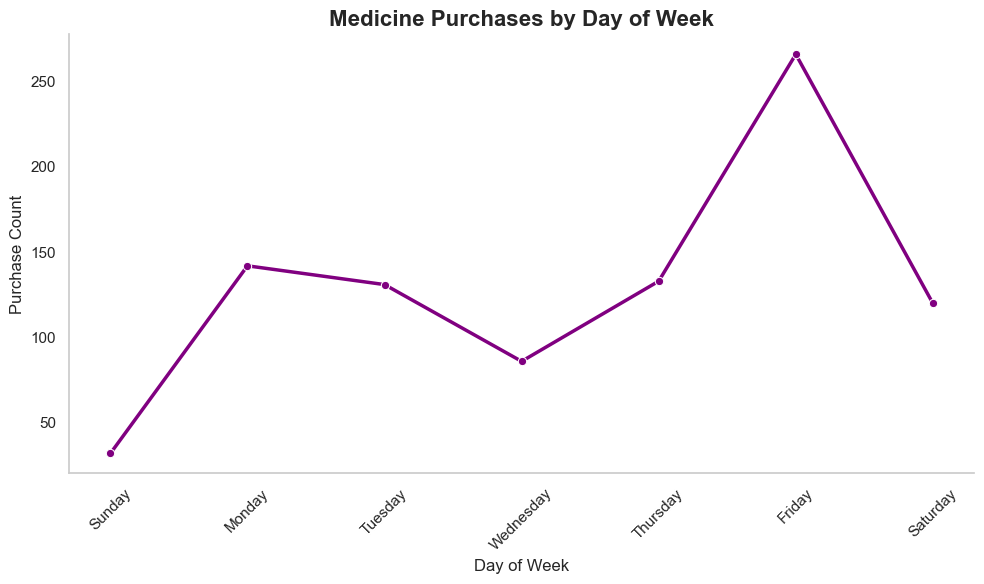

In [69]:
X=[]
Y=[]
uniq_days=final_data['Day of week'].unique()
for day in uniq_days:
    X.append(day)
    df=final_data[final_data['Day of week']==day]
    Y.append(df['Qty'].sum())
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set(style="whitegrid")

# Define the desired order of days
ordered_days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Create a DataFrame with the desired order
df = pd.DataFrame({'Day': X, 'Count': Y})
df['Day'] = pd.Categorical(df['Day'], categories=ordered_days, ordered=True)
df = df.sort_values('Day')


plt.figure(figsize=(10, 6))
#barplot = sns.barplot(x='Day', y='Count',data=df, palette='viridis',order=ordered_days)
sns.lineplot(x='Day', y='Count', data=df, marker='o', linewidth=2.5, color='purple')
plt.title('Medicine Purchases by Day of Week', fontsize=16, fontweight='bold')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Purchase Count', fontsize=12)
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.grid(False)
plt.savefig("Medicine purchase by Day of week")
plt.show()

In [70]:
final_data.columns

Index(['Date', 'Medicine name', 'Form of medicine', 'Medicine Class', 'Qty',
       'Whole sale pharmacy', 'Exp date', 'MRP', 'buying disc (%)',
       'final buying price', 'Pharma Company', 'Profit margin',
       'Months until expiry', 'Day of week', 'Month Name'],
      dtype='object')

## Finding out first and last date of buying medicine in this dataset

In [71]:
first_date=final_data['Date'].min()
last_date=final_data['Date'].max()
print(first_date)
print(last_date)

2023-11-06 00:00:00
2024-10-23 00:00:00


In [72]:
final_data['Month Name'].unique()

array(['November', 'June', 'July', 'August', 'May', 'April', 'December',
       'January', 'October', 'March', 'February'], dtype=object)

## Plotting medicine purchase by month of year

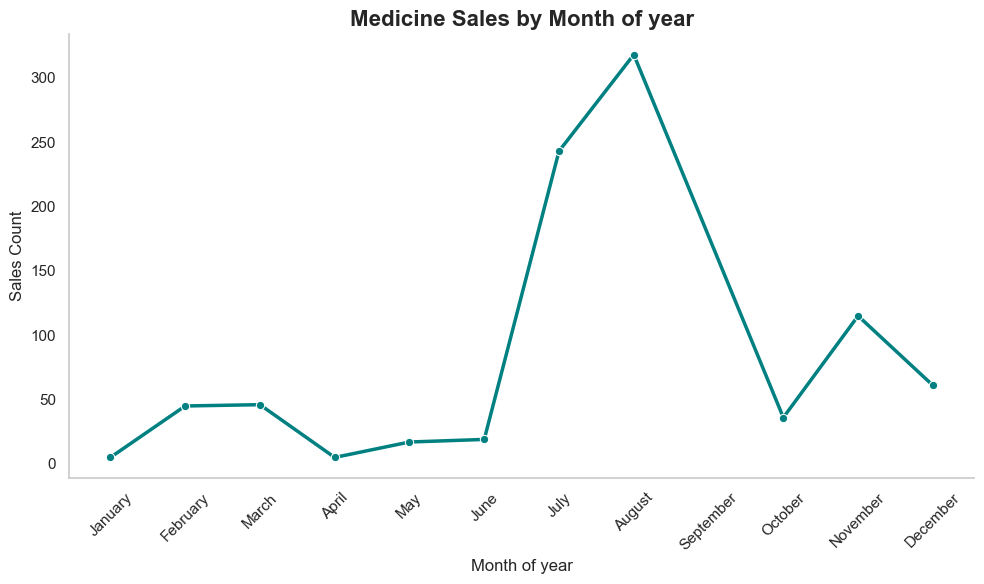

In [73]:
months=final_data['Month Name'].to_list()
uniq_months=list(set(months))
X=[]
Y=[]
for month in uniq_months:
    X.append(month)
    df=final_data[final_data['Month Name']==month]
    Y.append(df['Qty'].sum())
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set(style="whitegrid")

# Define the desired order of months
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November', 'December']

# Create a DataFrame with the desired order
df = pd.DataFrame({'Month': X, 'Count': Y})
df['Month'] = pd.Categorical(df['Month'], categories=ordered_months, ordered=True)
df = df.sort_values('Month')

#df = df[~df['Month'].isin(['August', 'October'])]

plt.figure(figsize=(10, 6))
#barplot = sns.barplot(x='Month', y='Count',data=df, palette='viridis',order=ordered_months)
sns.lineplot(x='Month', y='Count', data=df, marker='o', linewidth=2.5, color='teal')
plt.title('Medicine Sales by Month of year', fontsize=16, fontweight='bold')
plt.xlabel('Month of year', fontsize=12)
plt.ylabel('Sales Count', fontsize=12)
plt.xticks(rotation=45)
sns.despine()
plt.grid(False)
plt.tight_layout()
plt.savefig("Medicine sales by month of year")
plt.show()

## Trying to find out highest selling medicine classes in each month

In [74]:
uniq_month=final_data['Month Name'].unique()
for month in uniq_month:
    df=final_data[final_data['Month Name']==month]
    medicine_class=df['Medicine Class'].unique()
    d={}
    for clas in medicine_class:
        d[clas]=df[df['Medicine Class']==clas]['Qty'].sum()
    print(f"{month} : {max(d, key=d.get)}")

November : Anthelmintics
June : Antacid
July : Antibiotics
August : Antibiotics
May : Cold & Allergy Medicine
April : Anxiolytics
December : Antibiotics
January : Nutritional supplement
October : Nutritional supplement
March : Antibiotics
February : NSAIDs / Analgesics


In [75]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 459 entries, 0 to 422
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 459 non-null    datetime64[ns]
 1   Medicine name        459 non-null    object        
 2   Form of medicine     459 non-null    object        
 3   Medicine Class       459 non-null    object        
 4   Qty                  459 non-null    int64         
 5   Whole sale pharmacy  458 non-null    object        
 6   Exp date             452 non-null    datetime64[ns]
 7   MRP                  459 non-null    float64       
 8   buying disc (%)      459 non-null    float64       
 9   final buying price   459 non-null    float64       
 10  Pharma Company       459 non-null    object        
 11  Profit margin        459 non-null    float64       
 12  Months until expiry  452 non-null    float64       
 13  Day of week          459 non-null    obj

# Seeing the data spread, skewness and outliers in 'Months until expiry' column

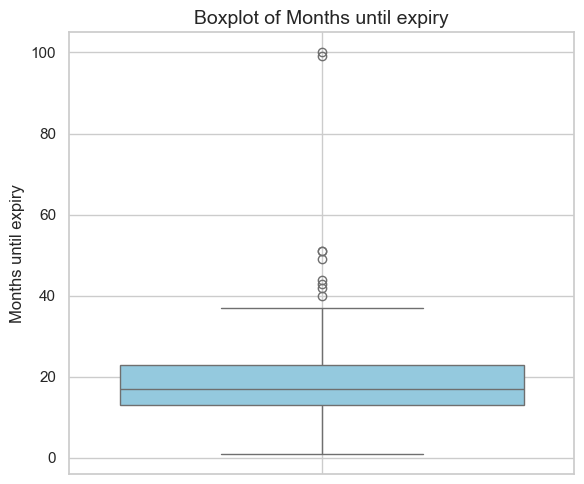

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.boxplot(y=final_data['Months until expiry'], color='skyblue')

plt.title('Boxplot of Months until expiry', fontsize=14)
plt.ylabel('Months until expiry')
plt.grid(True)
plt.tight_layout()
#plt.savefig('Months until expiry boxplot 1')
plt.show()



# Comments on the graph

# The distribution of 'Months until expiry' data is slightly right skewed. It's better to use median in place of mean to impute the missing values
# Only 2 products with very high expiry date over 8 yrs

# Imputing the 7 missing values in 'Months until expiry' column with the median

In [77]:
for clas in final_data['Medicine Class'].unique():
    median_val = final_data.loc[final_data['Medicine Class'] == clas, 'Months until expiry'].median()
    final_data.loc[
        (final_data['Medicine Class'] == clas) & (final_data['Months until expiry'].isna()),
        'Months until expiry'
    ] = median_val

print(final_data.isna().sum())

Date                   0
Medicine name          0
Form of medicine       0
Medicine Class         0
Qty                    0
Whole sale pharmacy    1
Exp date               7
MRP                    0
buying disc (%)        0
final buying price     0
Pharma Company         0
Profit margin          0
Months until expiry    2
Day of week            0
Month Name             0
dtype: int64


C:\Users\popth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\popth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [78]:
final_data[final_data['Months until expiry'].isna()]

# the below 2 products are only one in quantity. So its not possible to impute missing values in ' Months until expiry' column.

,Date,Medicine name,Form of medicine,Medicine Class,Qty,Whole sale pharmacy,Exp date,MRP,buying disc (%),final buying price,Pharma Company,Profit margin,Months until expiry,Day of week,Month Name
3,2024-06-30,Nestum 2 rice dal veg,baby food,Infant Nutrition / Baby Food,1,Sarkar Medicine Agency,NaT,209.0,8.0,192.28,Nestle,0.08,NaN,Sunday,June
268,2024-01-25,Nivea soft,facial cream,Skin Care,1,Rishav Medical Agency,NaT,52.0,28.0,37.44,NIVEA India Pvt,0.28,NaN,Thursday,January


In [79]:
final_data=final_data.dropna(subset=['Months until expiry'])

# Removing the column 'Exp date' from the dataset

In [80]:
final_data.drop(columns=['Exp date'],inplace=True)

# Dividing the months in 3 seasons and visulising season wise sales

In [81]:
def get_season(month_name):
    if month_name in ['March','April','May','June']:
        return "Summer"
    elif month_name in ['July','August','September','October']:
        return 'Monsoon'
    else:
        return "Winter"
final_data['Seasons']=final_data['Month Name'].apply(get_season)

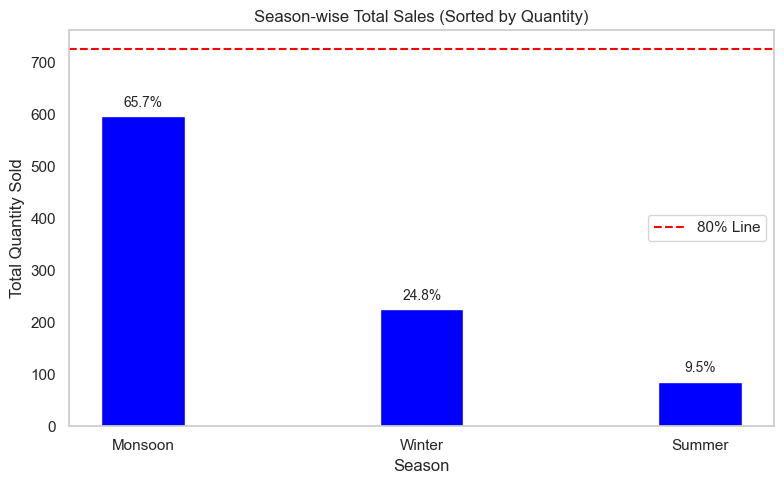

In [82]:
import matplotlib.pyplot as plt

# Compute total quantity sold per season
season_totals = final_data.groupby('Seasons')['Qty'].sum().sort_values(ascending=False)

# Data for plotting
seasons_sorted = season_totals.index.tolist()
quantities_sorted = season_totals.values

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(seasons_sorted, quantities_sorted, width=0.3, color='blue')

# Add 80% reference line
total_qty = sum(quantities_sorted)

# Adding what percentage of total sales does each season carry
for i, qty in enumerate(quantities_sorted):
    percent = (qty / total_qty) * 100
    plt.text(i, qty + total_qty * 0.02, f'{percent:.1f}%', ha='center', fontsize=10)

eighty_percent = 0.8 * total_qty
plt.axhline(eighty_percent, color='red', linestyle='--', linewidth=1.5, label='80% Line')

# Labels and title
plt.xlabel('Season')
plt.ylabel('Total Quantity Sold')
plt.title('Season-wise Total Sales (Sorted by Quantity)')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.savefig("Seasonal sales trends")
plt.show()

# Top 3 most selling medicines in each seasons

In [83]:
a = (
    final_data.groupby(['Seasons', 'Medicine Class'])['Qty']
    .sum()
    .groupby(level=0, group_keys=False)
    .nlargest(3)
)
print(a)

Seasons  Medicine Class         
Monsoon  Antibiotics                153
         NSAIDs / Analgesics         95
         Antacid                     67
Summer   Antibiotics                 29
         Antacid                     17
         Cold & Allergy Medicine     16
Winter   Antibiotics                 36
         Cold & Allergy Medicine     26
         Anthelmintics               25
Name: Qty, dtype: int64


# Top 3 medicines with maximum profit margin in each season

In [84]:
# Group by Season and Medicine Class, then calculate average profit margin
avg_profit = final_data.groupby(['Seasons', 'Medicine Class'])['Profit margin'].mean().reset_index()

# Sort by Season and descending average profit margin
avg_profit_sorted = avg_profit.sort_values(['Seasons', 'Profit margin'], ascending=[True, False])

# Get top 3 medicine classes for each season
top3_avg_profit = avg_profit_sorted.groupby('Seasons').head(3)

# Print nicely
for season, group in top3_avg_profit.groupby('Seasons'):
    print(f"\n{season}:")
    for _, row in group.iterrows():
        print(f"  {row['Medicine Class']} – Avg. Profit Margin: {row['Profit margin']:.2f}")


Monsoon:
  Anti-ulcer Agents – Avg. Profit Margin: 0.73
  IV Fluids – Avg. Profit Margin: 0.62
  Cold & Allergy Medicine – Avg. Profit Margin: 0.51

Summer:
  NSAIDs / Analgesics – Avg. Profit Margin: 0.47
  Laxatives – Avg. Profit Margin: 0.42
  Cold & Allergy Medicine – Avg. Profit Margin: 0.41

Winter:
  Antifungals – Avg. Profit Margin: 0.80
  Barrier Contraceptives – Avg. Profit Margin: 0.55
  Antacid – Avg. Profit Margin: 0.40


# Using boxplot to check for potential outliers, sperad of data and skewness in the 'Profit margin' column.

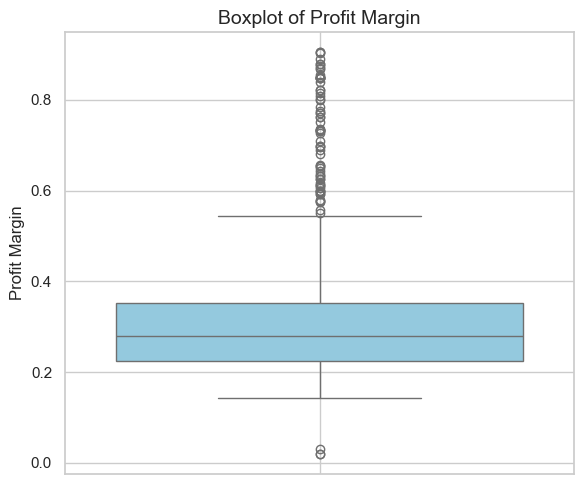

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.boxplot(y=final_data['Profit margin'], color='skyblue')

plt.title('Boxplot of Profit Margin', fontsize=14)
plt.ylabel('Profit Margin')
plt.grid(True)
plt.tight_layout()
plt.savefig('Profit margin boxplot')
plt.show()

# Finding out the wholesale pharmacy with maximum parchase

In [86]:
qty_by_pharmacy = final_data.groupby('Whole sale pharmacy', dropna=False)['Qty'].sum().sort_values(ascending=False)
print(qty_by_pharmacy)

Whole sale pharmacy
Zaman Medicine Agency     530
Sarkar Medicine Agency    109
B.S Medical Hall           83
Pal Medical Agency         80
Frank Ross Pharmacy        45
M/S Jeevan Deep            40
Haque Medicine Supply      13
Mazumdar Enterprise         3
Rishav Medical Agency       3
Rup Enterprise              1
NaN                         1
Name: Qty, dtype: int64


# Imputing the missing value in Whole sale pharmacy with the most appearing value that is 'Zaman Medicine Agency'

In [87]:
final_data['Whole sale pharmacy'].fillna('Zaman Medicine Agency', inplace=True)

# Total medicines sold in one year

In [88]:
print(f"Total medicines sold: {final_data['Qty'].sum()}")

Total medicines sold: 908


# Total revenue generated in one year by selling medicines

In [89]:
print(f"Total revenue generated from medicines: {round((final_data['Qty']*final_data['MRP']).sum(),2)}")

Total revenue generated from medicines: 99363.3


# Total money spent on buying medicine in one year

In [90]:
print(f"Total money spent on buying medicine in one year: {round((final_data['Qty']*final_data['final buying price']).sum(),2)}")

Total money spent on buying medicine in one year: 62581.97


# Total proft in one year

In [91]:
print(f"Total profit in one year: {round((final_data['Qty']*final_data['MRP']).sum(),2) - round((final_data['Qty']*final_data['final buying price']).sum(),2)}")

Total profit in one year: 36781.33


# Finding out the pharma company with maximum parchase

In [92]:
qty_by_pharma_company = final_data.groupby('Pharma Company', dropna=False)['Qty'].sum().sort_values(ascending=False)
print(qty_by_pharma_company)

Pharma Company
Sun Pharmaceutical Industries Ltd       125
Alkem Laboratories Ltd                  107
Glaxo SmithKline Pharmaceuticals Ltd     89
Aristo Pharmaceuticals Pvt Ltd           30
Dr Reddy's Laboratories Ltd              28
                                       ... 
S H Pharmaceuticals Ltd                   1
Palsons Derma Pvt Ltd                     1
RPG lifesciences Ltd                      1
Emcee Pharmaceuticals Pvt Ltd             1
Eli Lilly and company India Pvt Ltd       1
Name: Qty, Length: 89, dtype: int64


In [93]:
# saving the final dataframe
final_data.to_csv("final_data.csv",index=False)

# Monthly profit plot

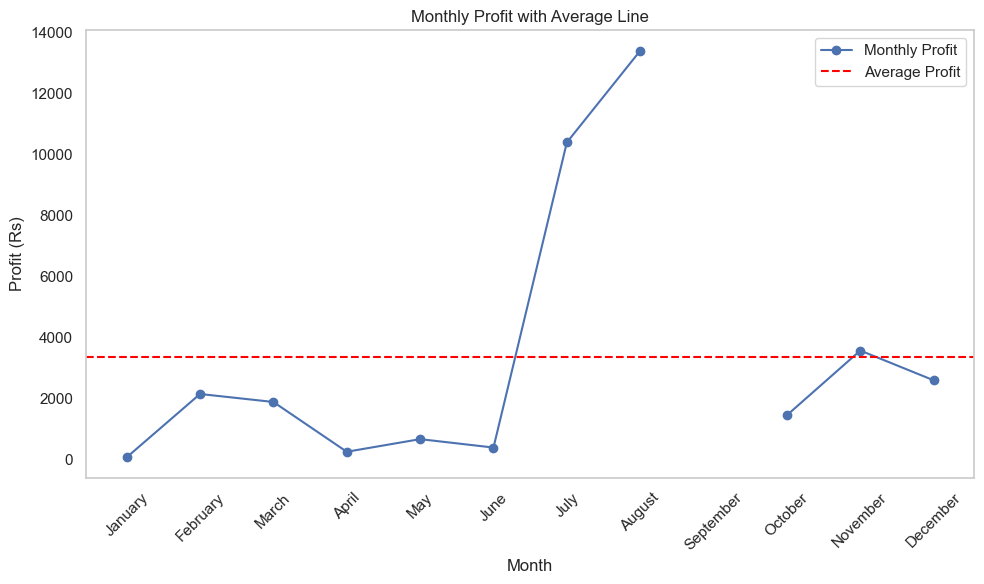

In [94]:
import matplotlib.pyplot as plt

# Step 1: Calculate profit per row
final_data['Profit per item'] = (final_data['MRP'] - final_data['final buying price'])

# Step 2: Group by month to get monthly profit
monthly_profit = final_data.groupby('Month Name').apply(lambda x: (x['Profit per item'] * x['Qty']).sum(), include_groups=False)

# Step 3: Order the months correctly
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
monthly_profit = monthly_profit.reindex(months_order)

# Step 4: Calculate average monthly profit
avg_profit = monthly_profit.mean()

# Step 5: Plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_profit.index, monthly_profit.values, marker='o', label='Monthly Profit')
plt.axhline(avg_profit, color='red', linestyle='--', label='Average Profit')
plt.title('Monthly Profit with Average Line')
plt.xlabel('Month')
plt.ylabel('Profit (Rs)')
plt.xticks(rotation=45)
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()



# No data in september due to shop close

# Seasonal profit plot

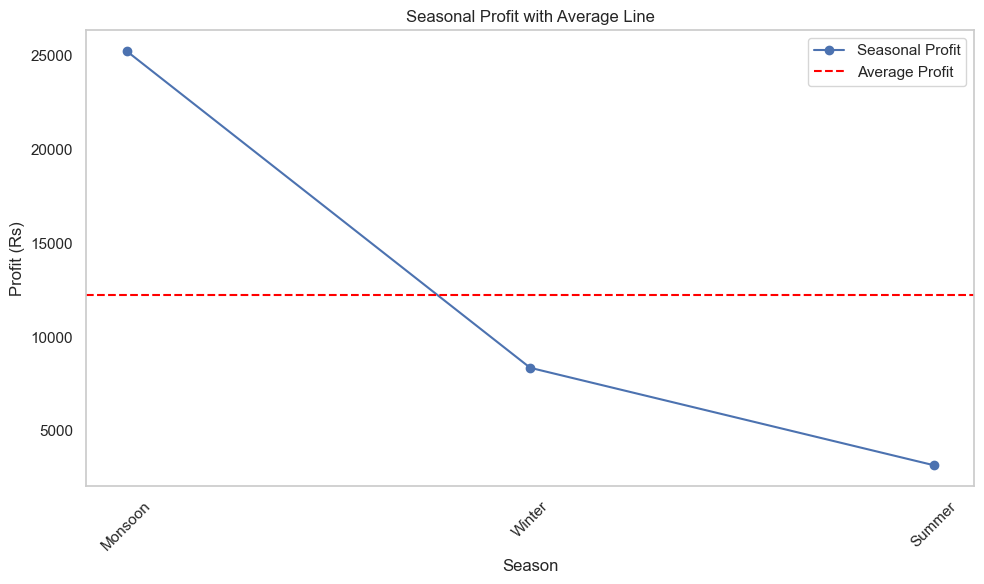

In [95]:

seasonal_profit = final_data.groupby('Seasons').apply(lambda x:(x['Profit per item']*x['Qty']).sum(),include_groups=False)


seasons_order = ['Monsoon', 'Winter','Summer']
seasonal_profit = seasonal_profit.reindex(seasons_order)


avg_profit = seasonal_profit.mean()

plt.figure(figsize=(10, 6))
plt.plot(seasonal_profit.index, seasonal_profit.values, marker='o', label='Seasonal Profit')
plt.axhline(avg_profit, color='red', linestyle='--', label='Average Profit')
plt.title('Seasonal Profit with Average Line')
plt.xlabel('Season')
plt.ylabel('Profit (Rs)')
plt.xticks(rotation=45)
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.savefig("Seasonal profit")
plt.show()

# Average profit margin

In [96]:
round(final_data['Profit margin'].mean(),2)

0.34

# Typical expiry duration

In [97]:
final_data['Months until expiry'].mode()

0    18.0
Name: Months until expiry, dtype: float64

In [98]:
final_data.info()
final_data_copy=final_data.copy() # making a copy of final_data

<class 'pandas.core.frame.DataFrame'>
Index: 457 entries, 0 to 422
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 457 non-null    datetime64[ns]
 1   Medicine name        457 non-null    object        
 2   Form of medicine     457 non-null    object        
 3   Medicine Class       457 non-null    object        
 4   Qty                  457 non-null    int64         
 5   Whole sale pharmacy  457 non-null    object        
 6   MRP                  457 non-null    float64       
 7   buying disc (%)      457 non-null    float64       
 8   final buying price   457 non-null    float64       
 9   Pharma Company       457 non-null    object        
 10  Profit margin        457 non-null    float64       
 11  Months until expiry  457 non-null    float64       
 12  Day of week          457 non-null    object        
 13  Month Name           457 non-null    obj

# deleting the column 'Profit per item' and 'Day of week' from final dataframe

In [99]:
final_data.drop(columns=['Profit per item','Day of week'],inplace=True)
final_data.to_csv("final_data.csv",index=False)

# Descriptive Statistics

In [100]:
desc_stat=final_data.select_dtypes(include=['number']).describe().T   # selecting the numerical columns from the dataset
desc_stat

,count,mean,std,min,25%,50%,75%,max
Qty,457.0,1.986871,1.838860,1.000000,1.00000,1.00000,2.000000,10.000000
MRP,457.0,135.299190,105.547666,5.900000,64.20000,110.00000,175.000000,779.500000
buying disc (%),457.0,33.573107,18.304356,1.940000,22.39000,28.03000,35.280000,90.470000
final buying price,457.0,91.470860,84.650038,2.000000,32.70000,68.50000,122.230000,604.880000
Profit margin,457.0,0.335730,0.183045,0.019435,0.22394,0.28033,0.352812,0.904667
Months until expiry,457.0,18.626915,9.693170,1.000000,13.00000,17.00000,23.000000,100.000000


In [101]:
desc_stat['range']=desc_stat['max']-desc_stat['min']
desc_stat['standard error']=final_data.select_dtypes(include=['number']).sem()
desc_stat['mode'] = final_data.select_dtypes(include=['number']).mode().iloc[0]
desc_stat['sample variance'] = final_data.select_dtypes(include=['number']).var()
desc_stat['kurtosis'] = final_data.select_dtypes(include=['number']).kurt()
desc_stat['skewness'] = final_data.select_dtypes(include=['number']).skew()
desc_stat['sum'] = final_data.select_dtypes(include=['number']).sum()

In [102]:
desc_stat=desc_stat.T.round(2)   # rounding upto 2 decimal places
desc_stat

,Qty,MRP,buying disc (%),final buying price,Profit margin,Months until expiry
count,457.00,457.00,457.00,457.00,457.00,457.00
mean,1.99,135.30,33.57,91.47,0.34,18.63
std,1.84,105.55,18.30,84.65,0.18,9.69
min,1.00,5.90,1.94,2.00,0.02,1.00
25%,1.00,64.20,22.39,32.70,0.22,13.00
50%,1.00,110.00,28.03,68.50,0.28,17.00
75%,2.00,175.00,35.28,122.23,0.35,23.00
max,10.00,779.50,90.47,604.88,0.90,100.00
range,9.00,773.60,88.53,602.88,0.89,99.00
standard error,0.09,4.94,0.86,3.96,0.01,0.45


In [103]:
desc_stat.to_csv("descriptive_stats.csv")    # saving the dataframe in a csv file

# Finding number of outliers in each numerical column

In [104]:
for col in final_data.select_dtypes(include=['number']).columns:
    q1=np.quantile(final_data[col],0.25)
    q3=np.quantile(final_data[col],0.75)
    IQR=q3-q1
    s=0
    for elem in final_data[col]:
        if elem<q1-1.5*IQR or elem>q3+1.5*IQR:
            s+=1
    print(f"total number of outliers in {col} is {s}")

total number of outliers in Qty is 45
total number of outliers in MRP is 27
total number of outliers in buying disc (%) is 73
total number of outliers in final buying price is 24
total number of outliers in Profit margin is 73
total number of outliers in Months until expiry is 9


# FINAL SUBMISSION contents starts from here

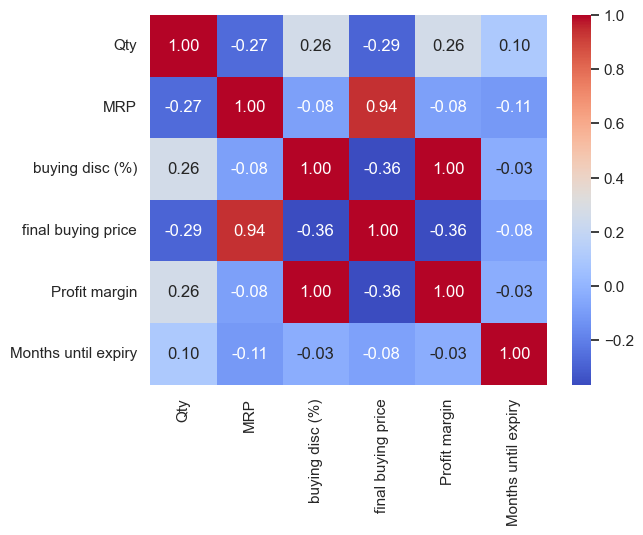

In [105]:
cor_mat=final_data.select_dtypes(include=['number']).corr()
sns.heatmap(cor_mat,annot=True,fmt=".2f",cmap='coolwarm')
if plt.savefig("correlation_matrix.jpg", bbox_inches='tight', pad_inches=0.2):
    print("figure saved at the given location.")
plt.show()

## Grouped bar chart to plot top 3 most selling medicines in each season

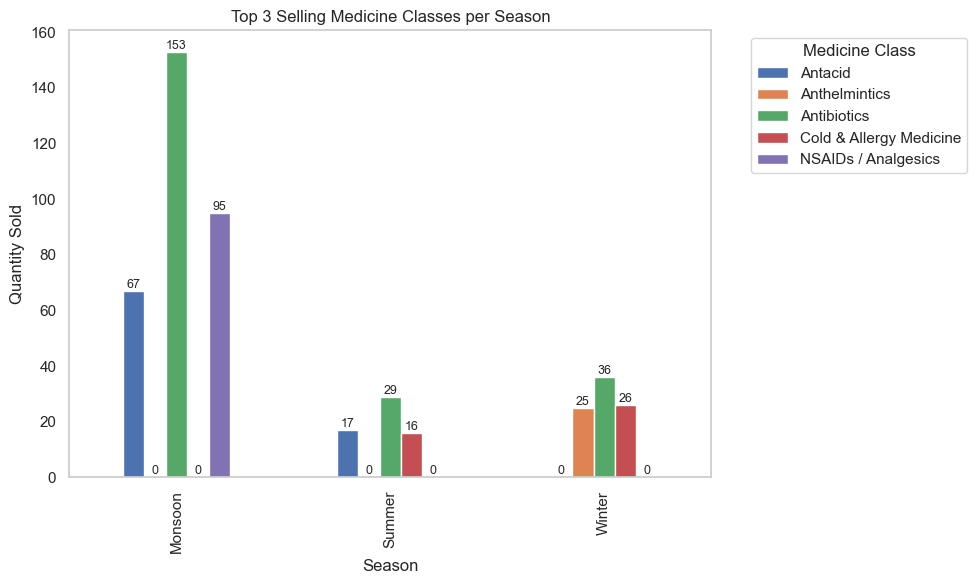

In [106]:
# Step 1: Get top 3 medicine classes per season
top3 = (
    final_data.groupby(['Seasons', 'Medicine Class'])['Qty']
    .sum()
    .groupby(level=0, group_keys=False)
    .nlargest(3)
).reset_index(name='Qty')

# Step 2: Pivot the table — only includes top 3 per season now
pivot_df = top3.pivot(index='Seasons', columns='Medicine Class', values='Qty')

# Step 3: Plot grouped bar chart (side by side)
ax = pivot_df.plot(kind='bar', figsize=(10, 6))

# Step 4: Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=9)

# Styling
plt.title('Top 3 Selling Medicine Classes per Season')
plt.ylabel('Quantity Sold')
plt.xlabel('Season')
plt.legend(title='Medicine Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(False)
plt.savefig("top_3_most_selling.png")
plt.show()

### fraction of revenue generated by selling antibiotics

In [107]:
antibiotics_df=final_data[final_data['Medicine Class']=="Antibiotics"]
total_rev=sum(final_data['Qty']*final_data['MRP'])
antibiotics_rev=sum(antibiotics_df['Qty']*antibiotics_df['MRP'])
print(f"fraction of revenue by antibiotics {(antibiotics_rev/total_rev)*100:.2f}%")

fraction of revenue by antibiotics 27.81%


### Checking expiry duration of antibiotics

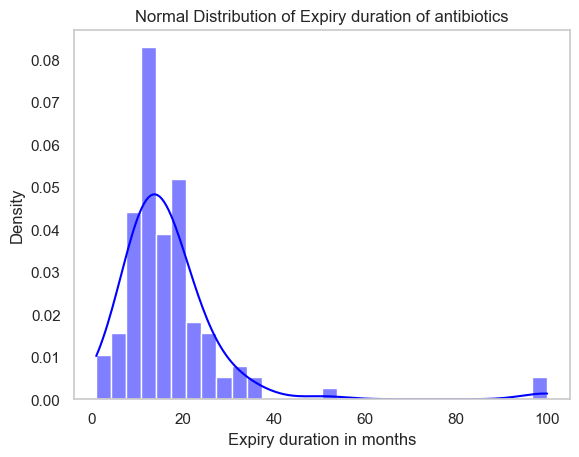

In [108]:
# Plot normal distribution for the 'Qty' column
sns.histplot(data=final_data[final_data['Medicine Class']=="Antibiotics"], x='Months until expiry', kde=True, stat='density', bins=30, color='blue')
plt.title('Normal Distribution of Expiry duration of antibiotics')
plt.xlabel('Expiry duration in months')
plt.ylabel('Density')
plt.grid(False)
plt.savefig("expiry_of_antibiotics.png")
plt.show()

### top 8 most selling medicines throughout the year

In [109]:
print(
    final_data.groupby(['Medicine Class'])['Qty']
    .sum()
    .nlargest(8)
)

Medicine Class
Antibiotics                 218
NSAIDs / Analgesics         117
Antacid                     108
Cold & Allergy Medicine     104
Nutritional supplement       64
Anthelmintics                54
Cough Syrup                  33
Antidiabetic Medications     24
Name: Qty, dtype: int64


In [110]:
print(f"The above 8 medicines contribute to {(218+117+108+104+64+54+33+24)/908*100:.2f}% of total quantity sold")

The above 8 medicines contribute to 79.52% of total quantity sold


In [111]:
ff=final_data.groupby(['Medicine Class'])['Qty'].sum().nlargest(8).index.tolist()   # list of top 8 most selling medicines
total_revenue=round((final_data['Qty']*final_data['MRP']).sum(),2)

# revenue generated from top 5 most selling medicines
s=0
for elem in ff:
    s+=(final_data[final_data['Medicine Class']==elem]['Qty']*final_data[final_data['Medicine Class']==elem]['MRP']).sum()
print(f"The above 8 medicines contribute to {int(round(s/total_revenue,2)*100)}% of total revenue")

The above 8 medicines contribute to 78% of total revenue


### Pareto chart of all the medicine classes sales

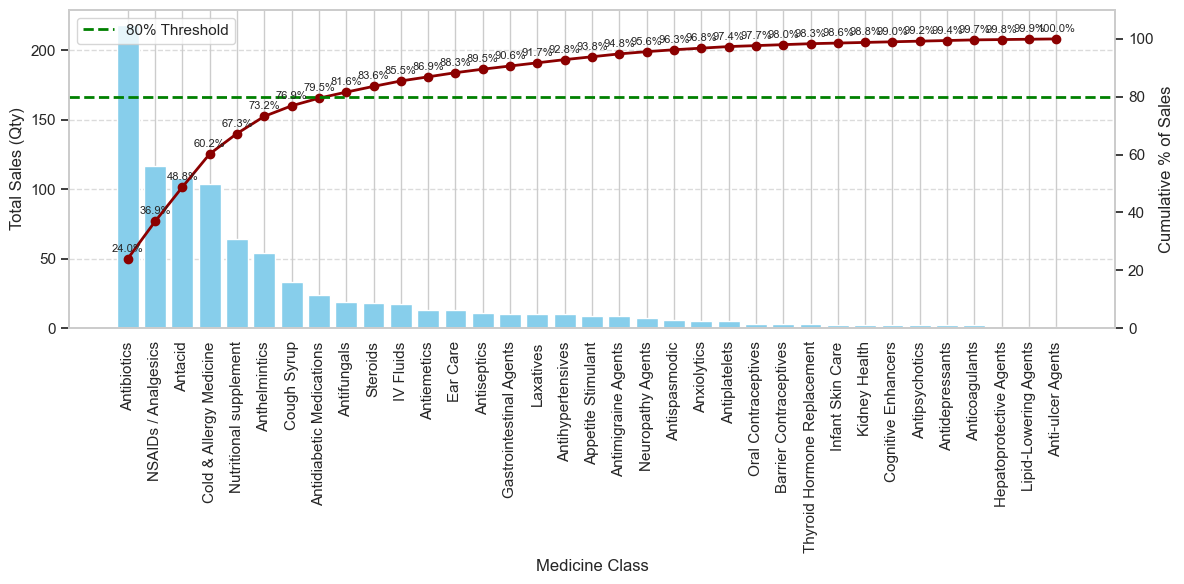

In [112]:
# Step 1: Group and sort by total sales
sales_by_class = final_data.groupby('Medicine Class')['Qty'].sum().sort_values(ascending=False)

# Step 2: Calculate cumulative percentage
cumulative_sales = sales_by_class.cumsum()
cumulative_percentage = 100 * cumulative_sales / sales_by_class.sum()

# Step 3: Setup figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Step 4: Bar chart for sales
bars = ax1.bar(sales_by_class.index, sales_by_class.values, color='skyblue')
ax1.set_ylabel('Total Sales (Qty)', fontsize=12)
ax1.set_xlabel('Medicine Class', fontsize=12)
ax1.tick_params(axis='x',rotation=90)
#ax1.set_title('Pareto Chart of Medicine Class Sales with 80% Line', fontsize=14)

# Step 5: Line chart for cumulative %
ax2 = ax1.twinx()
ax2.plot(sales_by_class.index, cumulative_percentage, color='darkred', marker='o', linewidth=2)
ax2.set_ylabel('Cumulative % of Sales', fontsize=12)
ax2.axhline(80, color='green', linestyle='--', linewidth=2, label='80% Threshold')
ax2.set_ylim(0, 110)

# Step 6: Add annotations on the line
for x, y in zip(sales_by_class.index, cumulative_percentage):
    ax2.annotate(f'{y:.1f}%', (x, y), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

# Step 7: Grid and legend
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.legend(loc='upper left')

# Beautify layout
plt.tight_layout()
plt.grid(False)
plt.savefig("top_sold_medicines_pareto.png")
plt.show()

### Line chart of top 8 medicine supply throughout the year

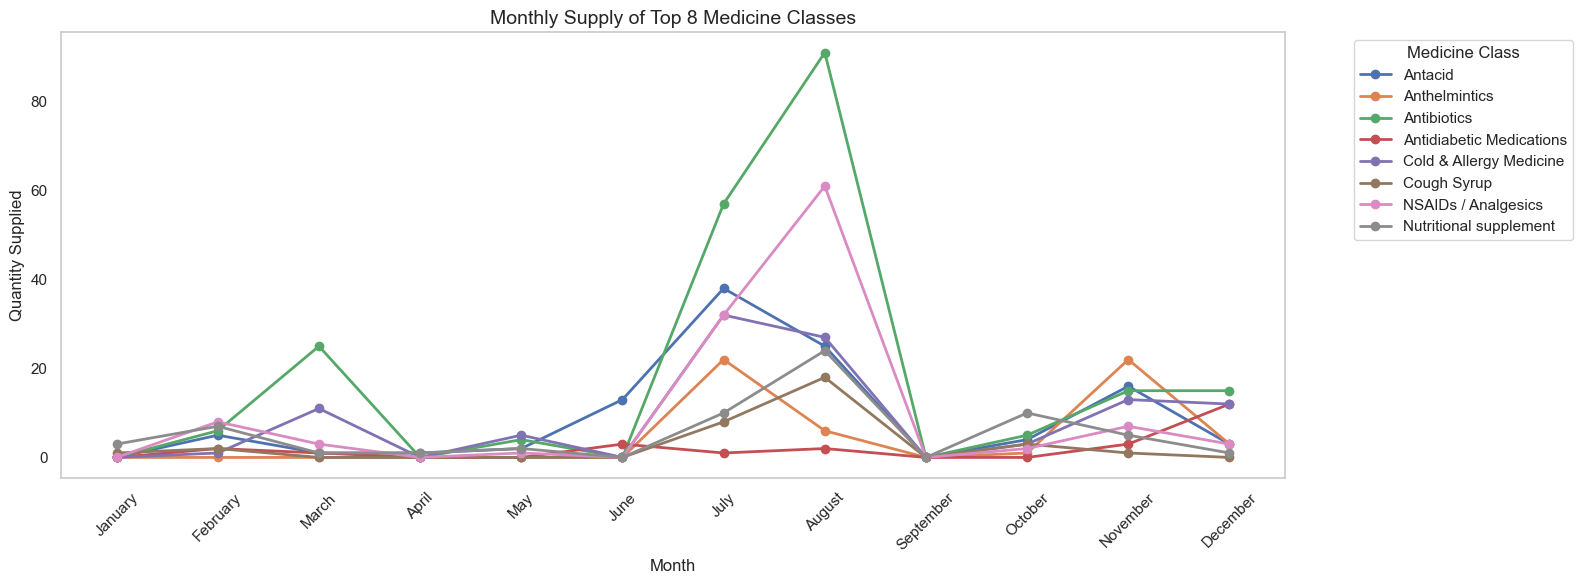

In [113]:
# Define month order for correct plotting
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Step 1: Filter for top 8 medicine classes
filtered = final_data[final_data['Medicine Class'].isin(ff)]

# Step 2: Group by Month and Medicine Class, then sum Qty
monthly_sales = (
    filtered.groupby(['Month Name', 'Medicine Class'])['Qty']
    .sum()
    .reset_index()
)

# Step 3: Pivot and reindex to get months in order, then fill NaN with 0
pivot_df = (
    monthly_sales.pivot(index='Month Name', columns='Medicine Class', values='Qty')
    .reindex(month_order)
    .fillna(0)
)

# Step 4: Plot
fig, ax = plt.subplots(figsize=(16, 6))
pivot_df.plot(ax=ax, marker='o', linewidth=2)

# Step 5: Label and beautify
ax.set_title('Monthly Supply of Top 8 Medicine Classes', fontsize=14)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Quantity Supplied', fontsize=12)
ax.set_xticks(range(len(month_order)))
ax.set_xticklabels(month_order, rotation=45)
ax.grid(False)
ax.legend(title='Medicine Class', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig("Yearwise supply of top 8 medicines.png")
plt.show()

### KDE plot expiry duration of top 8 performing medicines

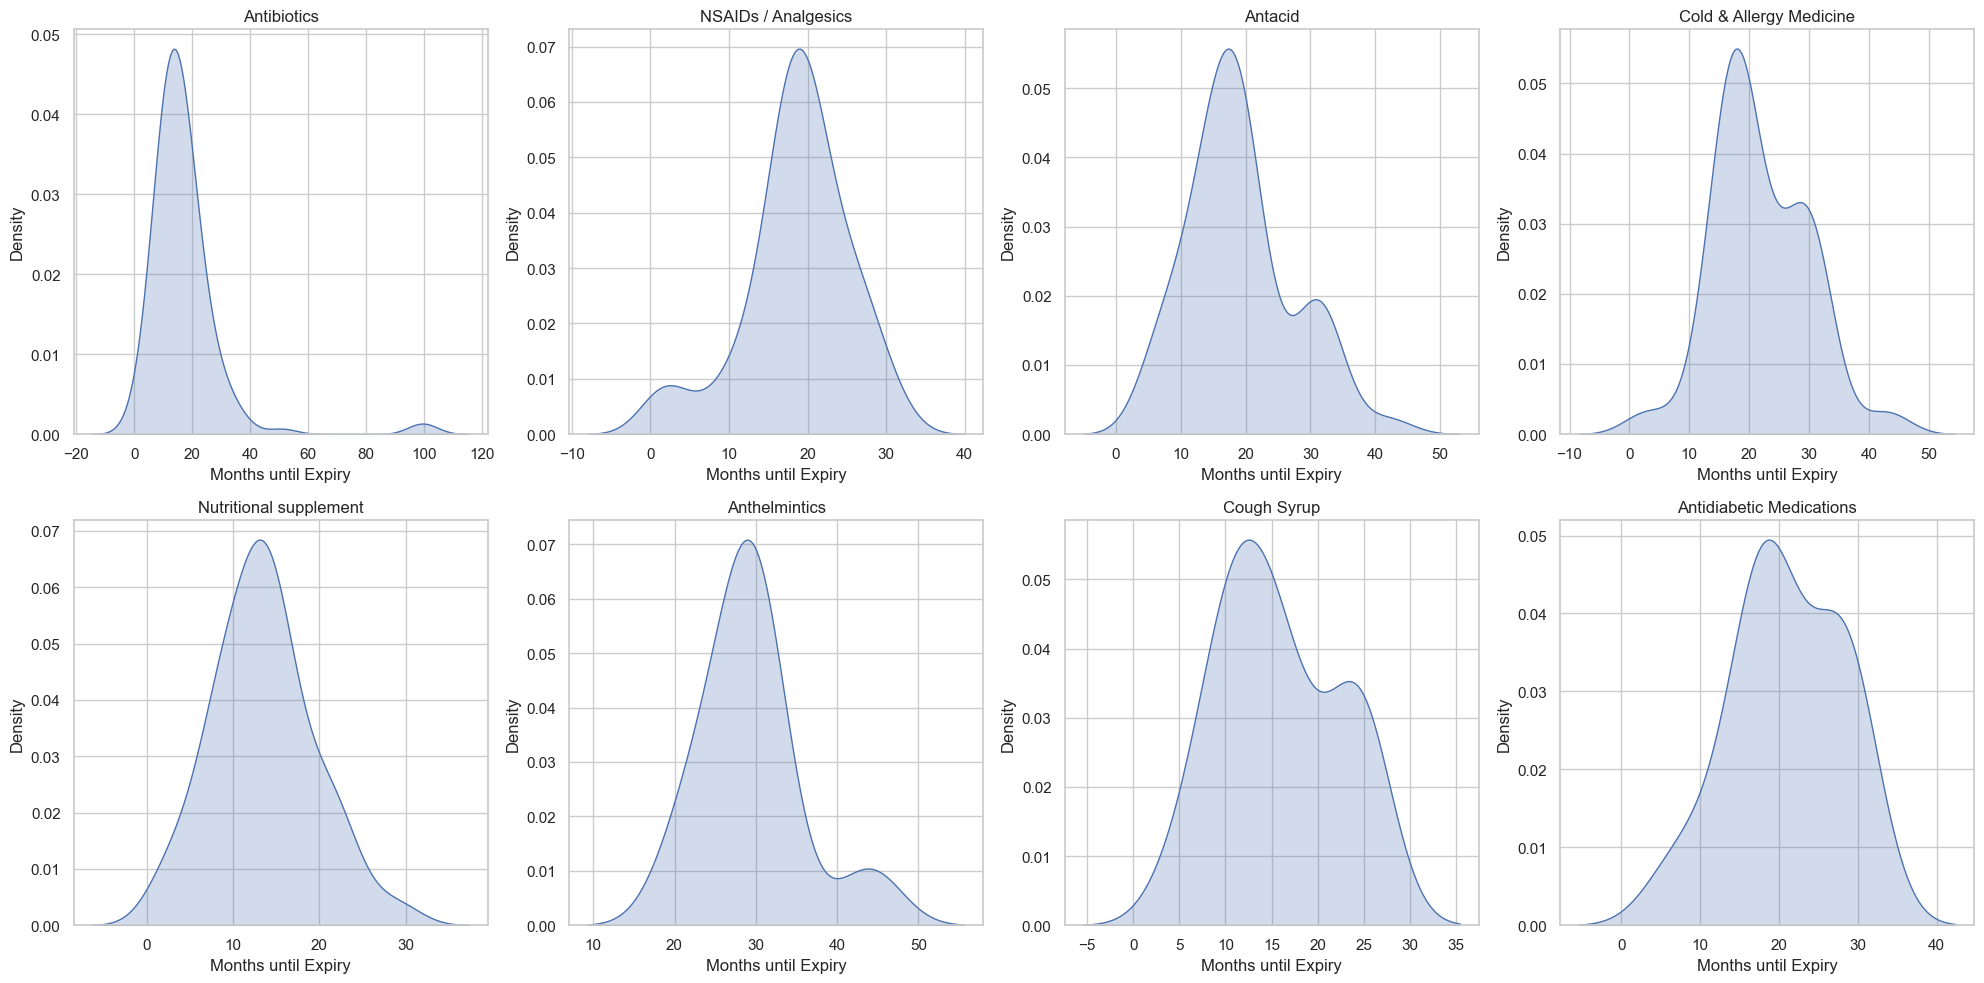

In [114]:
# Set style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # 2 rows, 4 columns
axes = axes.flatten()  # Flatten to access easily in loop

# Plot each medicine class in ff
for i, med_class in enumerate(ff):
    sns.kdeplot(
        data=final_data[final_data['Medicine Class'] == med_class],
        x='Months until expiry',
        fill=True,
        ax=axes[i]
    )
    axes[i].set_title(f"{med_class}", fontsize=12)
    axes[i].set_xlabel("Months until Expiry")
    axes[i].set_ylabel("Density")

# Adjust layout
plt.tight_layout()
plt.savefig("expiry_distribution.png")
plt.show()

# Let's move on to pricing strategy and improve profitability

### Suppliers who provide max discount on average on top 8 medicine classes

In [115]:
# Group by Medicine Class and supplier, then calculate the average discount
grouped_discounts = final_data.groupby(['Medicine Class', 'Whole sale pharmacy'])['buying disc (%)'].mean()

# For each Medicine Class, find the supplier that provides the maximum average discount
max_discount_by_class = grouped_discounts.groupby(level=0).idxmax().apply(lambda x: (x[1], grouped_discounts[x]))

for med_class, (wholesale, discount) in max_discount_by_class.items():
    print(f"{wholesale} gives the highest average discount of {discount:.2f}% on '{med_class}'")

B.S Medical Hall gives the highest average discount of 44.33% on 'Antacid'
Pal Medical Agency gives the highest average discount of 29.55% on 'Anthelmintics'
Zaman Medicine Agency gives the highest average discount of 73.04% on 'Anti-ulcer Agents'
B.S Medical Hall gives the highest average discount of 44.34% on 'Antibiotics'
Zaman Medicine Agency gives the highest average discount of 22.00% on 'Anticoagulants'
Zaman Medicine Agency gives the highest average discount of 21.60% on 'Antidepressants'
Sarkar Medicine Agency gives the highest average discount of 25.79% on 'Antidiabetic Medications'
Zaman Medicine Agency gives the highest average discount of 27.55% on 'Antiemetics'
Pal Medical Agency gives the highest average discount of 85.57% on 'Antifungals'
B.S Medical Hall gives the highest average discount of 28.84% on 'Antihypertensives'
B.S Medical Hall gives the highest average discount of 42.78% on 'Antimigraine Agents'
Zaman Medicine Agency gives the highest average discount of 22.

In [116]:
# How much discount is provided by different suppliers on Antibiotics

final_data[final_data['Medicine Class']=='Antibiotics'].groupby('Whole sale pharmacy')['buying disc (%)'].mean()

Whole sale pharmacy
B.S Medical Hall          44.338750
Frank Ross Pharmacy       17.000000
Haque Medicine Supply     22.400000
M/S Jeevan Deep           29.276667
Pal Medical Agency        35.151250
Sarkar Medicine Agency    41.758000
Zaman Medicine Agency     34.446628
Name: buying disc (%), dtype: float64

### Suppliers from where owner buying maximum medicines without knowing who provides maximum discount

In [117]:
l = [
    "Antibiotics",
    "NSAIDs / Analgesics",
    "Antacid",
    "Cold & Allergy Medicine",
    "Nutritional supplement",
    "Anthelmintics",
    "Cough Syrup",
    "Antidiabetic Medications",
    "Anti-ulcer Agents",
    "Anticoagulants",
    "Antidepressants",
    "Antiemetics",
    "Antifungals",
    "Antihypertensives",
    "Antimigraine Agents",
    "Antiplatelets"
]
for elem in l:
    group = final_data[final_data['Medicine Class'] == elem].groupby('Whole sale pharmacy')['Qty'].sum()
    print(f"{elem}: {group.idxmax()} ({group.max()})")

Antibiotics: Zaman Medicine Agency (152)
NSAIDs / Analgesics: Zaman Medicine Agency (80)
Antacid: Zaman Medicine Agency (60)
Cold & Allergy Medicine: Zaman Medicine Agency (60)
Nutritional supplement: Zaman Medicine Agency (34)
Anthelmintics: Zaman Medicine Agency (19)
Cough Syrup: Zaman Medicine Agency (27)
Antidiabetic Medications: Frank Ross Pharmacy (11)
Anti-ulcer Agents: Zaman Medicine Agency (1)
Anticoagulants: Zaman Medicine Agency (2)
Antidepressants: Sarkar Medicine Agency (1)
Antiemetics: M/S Jeevan Deep (6)
Antifungals: Zaman Medicine Agency (10)
Antihypertensives: Pal Medical Agency (5)
Antimigraine Agents: Zaman Medicine Agency (6)
Antiplatelets: Zaman Medicine Agency (3)


### what if the owner buys medicines from the suppliers who provides maximum purchase discount ?

In [118]:
present_profit = 36781.33
grouped_discounts = final_data.groupby(['Medicine Class', 'Whole sale pharmacy'])['buying disc (%)'].mean()

# For each Medicine Class, find the supplier that provides the maximum average discount
max_discount_by_class = grouped_discounts.groupby(level=0).idxmax().apply(lambda x: (x[1], grouped_discounts[x]))

profit=0
for med_class, (wholesale, discount) in max_discount_by_class.items():
    selling_price,cost_price=0,0
    present_df=final_data[final_data['Medicine Class']==med_class].reset_index()
    for i in range(present_df.shape[0]):
        selling_price+=present_df['MRP'][i]*present_df['Qty'][i]
        cost_price+=present_df['MRP'][i]*(1-discount/100)*present_df['Qty'][i]
    profit+=selling_price-cost_price
print(f"Increase in annual profit is {(profit-present_profit):.2f}")
print(f"percent increase in annual profit is {(profit-present_profit)/present_profit*100:.2f}%")

Increase in annual profit is 5330.88
percent increase in annual profit is 14.49%


### Segmentaion of medicines depending on their demand and profit margin -- High, moderate and low demand

In [119]:
sales_by_class = final_data.groupby('Medicine Class')['Qty'].sum().sort_values(ascending=False)
high_demand,moderate_demand,low_demand=[],[],[]
high_demand_high_profit, high_demand_low_profit,moderate_demand_high_profit, moderate_demand_low_profit,low_demand_high_profit, low_demand_low_profit=[],[],[],[],[],[]
high_demand_moderate_profit,moderate_demand_moderate_profit,low_demand_moderate_profit=[],[],[]
for med_class,qty in sales_by_class.items():
    if qty>100:
        high_demand.append(med_class)
    elif 20<=qty<=100:
        moderate_demand.append(med_class)
    else:
        low_demand.append(med_class)

low,high=final_data['Profit margin'].quantile([0.25,0.75])

print(high,low)
for elem in high_demand:
    if final_data[final_data['Medicine Class']==elem]['Profit margin'].mean()>=high:
        high_demand_high_profit.append(elem)
    elif low<final_data[final_data['Medicine Class']==elem]['Profit margin'].mean()<high:
        high_demand_moderate_profit.append(elem)
    else:
        hight_demand_low_profit.append(elem)

for elem in moderate_demand:
    if final_data[final_data['Medicine Class']==elem]['Profit margin'].mean()>=high:
        moderate_demand_high_profit.append(elem)
    elif low<final_data[final_data['Medicine Class']==elem]['Profit margin'].mean()<high:
        moderate_demand_moderate_profit.append(elem)
    else:
        moderate_demand_low_profit.append(elem)

for elem in low_demand:
    if final_data[final_data['Medicine Class']==elem]['Profit margin'].mean()>=high:
        low_demand_high_profit.append(elem)
    elif low<final_data[final_data['Medicine Class']==elem]['Profit margin'].mean()<high:
        low_demand_moderate_profit.append(elem)
    else:
        low_demand_low_profit.append(elem)

print(high_demand_high_profit)
print(high_demand_moderate_profit)
print(high_demand_low_profit)
print("\n")
print(moderate_demand_high_profit)
print(moderate_demand_moderate_profit)
print(moderate_demand_low_profit)
print("\n")
print(low_demand_high_profit)
print(low_demand_moderate_profit)
print(low_demand_low_profit)

0.3528118842 0.2239401496
['Antibiotics', 'Antacid', 'Cold & Allergy Medicine']
['NSAIDs / Analgesics']
[]


['Nutritional supplement']
['Anthelmintics', 'Cough Syrup']
['Antidiabetic Medications']


['Antifungals', 'IV Fluids', 'Appetite Stimulant', 'Antimigraine Agents', 'Barrier Contraceptives', 'Anti-ulcer Agents']
['Antiemetics', 'Ear Care', 'Antiseptics', 'Gastrointestinal Agents', 'Laxatives', 'Antihypertensives', 'Anxiolytics', 'Infant Skin Care', 'Kidney Health', 'Antipsychotics', 'Hepatoprotective Agents', 'Lipid-Lowering Agents']
['Steroids', 'Neuropathy Agents', 'Antispasmodic', 'Antiplatelets', 'Oral Contraceptives', 'Thyroid Hormone Replacement', 'Cognitive Enhancers', 'Antidepressants', 'Anticoagulants']


### Price Elasticity analysis to check which of the above classifications need discount in selling price

In [120]:
# Group monthly sales and average MRP per medicine class
monthly_sales = final_data.groupby([
    pd.Grouper(key='Date', freq='M'), 
    'Medicine Class'
]).agg({
    'Qty': 'sum',
    'MRP': 'mean'
}).reset_index()


monthly_sales['pct_change_qty'] = monthly_sales.groupby('Medicine Class')['Qty'].pct_change()
monthly_sales['pct_change_price'] = monthly_sales.groupby('Medicine Class')['MRP'].pct_change()


monthly_sales['elasticity'] = monthly_sales['pct_change_qty'] / monthly_sales['pct_change_price']


from scipy.stats.mstats import winsorize
monthly_sales['elasticity'] = winsorize(
    monthly_sales['elasticity'], limits=[0.05, 0.05]  # trim top and bottom 5% due to some very high price elasticity
)

# Remove problematic values
#monthly_sales = monthly_sales.replace([np.inf, -np.inf], np.nan)  # Replace inf with NaN
#monthly_sales = monthly_sales.dropna()       # Drop rows with NaN elasticity

segment_elasticity = {}

for segment, med_list in {
    "HD_HP": high_demand_high_profit,
    "MD_HP": moderate_demand_high_profit,
    "MD_MP": moderate_demand_moderate_profit,
    "MD_LP": moderate_demand_low_profit,
    "LD_HP": low_demand_high_profit,
    "LD_MP": low_demand_moderate_profit,
}.items():
    filtered = monthly_sales[monthly_sales['Medicine Class'].isin(med_list)]
    avg_elasticity = filtered['elasticity'].mean()
    segment_elasticity[segment] = avg_elasticity

print(segment_elasticity)

{'HD_HP': 1.2476137505384848, 'MD_HP': -0.9313291734162534, 'MD_MP': 3.4043486454747125, 'MD_LP': -0.30757284889675784, 'LD_HP': 5.776756693938971, 'LD_MP': -1.6422467962271545}


## Applying below discounts on different medicine segments
### Moderate demand high profit 10% discount 28% increase in demand
### Moderate demand moderate profit 10% discount 42% increase in demand
### low demand high profit 15% discount 49% increase in demand
### low demand moderate profit 15% discount 24% demand increase

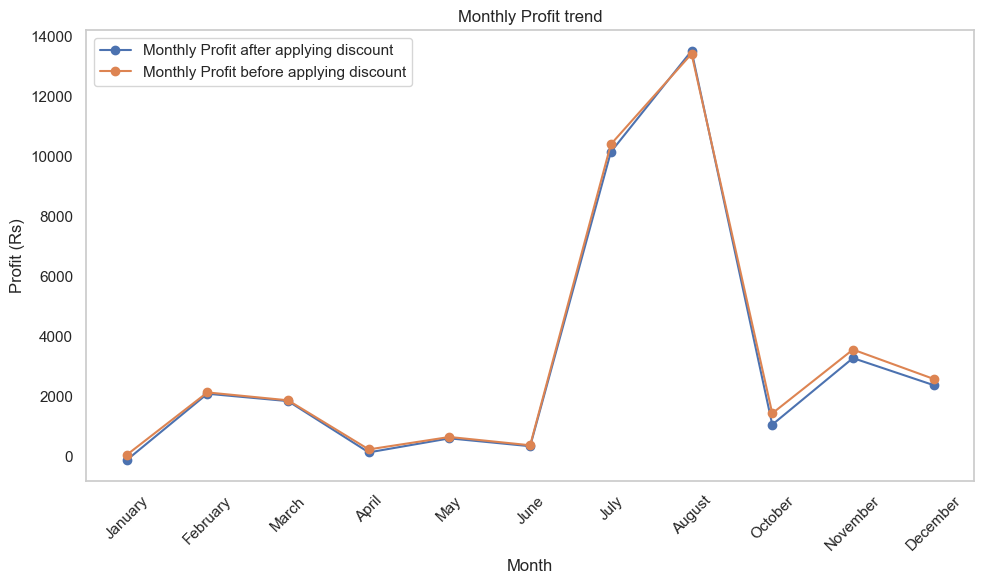

In [121]:
#monthly profit trend before pricing strategy

# Step 1: Calculate profit per row
final_data['Profit per item'] = (final_data['MRP'] - final_data['final buying price'])

# Step 2: Group by month to get monthly profit
monthly_profit = final_data.groupby('Month Name').apply(lambda x: (x['Profit per item'] * x['Qty']).sum(), include_groups=False)

# Step 3: Order the months correctly, but exclude September
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'October', 'November', 'December']  # ❌ Removed 'September'
monthly_profit = monthly_profit.reindex(months_order)



# monthly profit trend after pricing strategy

# Step 1: Define a function to assign discount based on medicine class
def get_discount_rate(med_class):
    if med_class in moderate_demand_high_profit:
        return 0.10
    elif med_class in moderate_demand_moderate_profit:
        return 0.10
    elif med_class in low_demand_high_profit:
        return 0.15
    elif med_class in low_demand_moderate_profit:
        return 0.15
    else:
        return 0.0  # No discount if not in any list

# Step 2: Apply discount rate
final_data['Discount Rate'] = final_data['Medicine Class'].apply(get_discount_rate)

# Step 3: Calculate Discounted Selling Price
final_data['Discounted Selling Price'] = final_data['MRP'] * (1 - final_data['Discount Rate'])

# Step 4: Calculate New Profit per Item
final_data['New Profit per item'] = final_data['Discounted Selling Price'] - final_data['final buying price']



def increase_qty(med_class):
    if med_class in moderate_demand_high_profit:
        return 0.28
    elif med_class in moderate_demand_moderate_profit:
        return 0.422
    elif med_class in low_demand_high_profit:
        return 0.489
    elif med_class in low_demand_moderate_profit:
        return 0.243
    else:
        return 0.0

final_data['increase qty rate'] = final_data['Medicine Class'].apply(increase_qty)

final_data['New Qty'] = final_data['Qty'] * (1 + final_data['increase qty rate'])




new_monthly_profit = final_data.groupby('Month Name').apply(lambda x: (x['New Profit per item'] * x['New Qty']).sum(), include_groups=False)

new_monthly_profit = new_monthly_profit.reindex(months_order)

# Step 4: Plot
plt.figure(figsize=(10, 6))
plt.plot(new_monthly_profit.index, new_monthly_profit.values, marker='o', label='Monthly Profit after applying discount')
plt.plot(monthly_profit.index, monthly_profit.values, marker='o', label='Monthly Profit before applying discount')


plt.title('Monthly Profit trend')
plt.xlabel('Month')
plt.ylabel('Profit (Rs)')
plt.xticks(rotation=45)
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.savefig("before_disc_after_disc.png")
plt.show()

In [122]:
profit_before_disc=round(sum(monthly_profit.values))
profit_after_disc=round(sum(new_monthly_profit.values))
s=round(((profit_after_disc-profit_before_disc)/profit_before_disc)*100)
print(f"Change in annual profit is {s}%")
print(f"Change in annual profit is {profit_after_disc-profit_before_disc}")

Change in annual profit is -4%
Change in annual profit is -1442


In [125]:
final_data.columns

Index(['Date', 'Medicine name', 'Form of medicine', 'Medicine Class', 'Qty',
       'Whole sale pharmacy', 'MRP', 'buying disc (%)', 'final buying price',
       'Pharma Company', 'Profit margin', 'Months until expiry', 'Month Name',
       'Seasons'],
      dtype='object')

In [124]:
final_data=final_data.drop(columns=['Profit per item', 'Discount Rate',
       'Discounted Selling Price', 'New Profit per item', 'increase qty rate',
       'New Qty'])